In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('Consumer_Complaints.csv')
df.head()

/usr/local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (5,6,11,16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,07/02/2019,Debt collection,Payday loan debt,Took or threatened to take negative or legal a...,Threatened to arrest you or take you to jail i...,NaN,NaN,"Acceptance Solutions Group, INC",TX,775XX,NaN,NaN,Web,07/02/2019,Closed with explanation,Yes,NaN,3293714
1,07/02/2019,Debt collection,Other debt,Attempts to collect debt not owed,Debt was already discharged in bankruptcy and ...,NaN,Company believes complaint is the result of an...,Source Receivables Management LLC,FL,331XX,NaN,NaN,Web,07/02/2019,Closed with non-monetary relief,Yes,NaN,3293316
2,07/02/2019,"Payday loan, title loan, or personal loan",Installment loan,Struggling to pay your loan,NaN,NaN,NaN,CURO Intermediate Holdings,OH,442XX,NaN,NaN,Web,07/02/2019,Closed with explanation,Yes,NaN,3294303
3,07/02/2019,Debt collection,Other debt,Attempts to collect debt not owed,Debt was paid,NaN,NaN,"Diversified Consultants, Inc.",TN,385XX,NaN,NaN,Web,07/02/2019,Closed with explanation,Yes,NaN,3294249
4,07/02/2019,Debt collection,Credit card debt,Written notification about debt,Didn't receive enough information to verify debt,NaN,NaN,Terrill Outsourcing Group,SC,297XX,NaN,NaN,Web,07/02/2019,Closed with explanation,Yes,NaN,3293560


In [3]:
from io import StringIO

In [4]:
col = ['Product', 'Consumer complaint narrative']
df = df[col]
df = df[pd.notnull(df['Consumer complaint narrative'])]

df.columns = ['Product', 'Consumer_complaint_narrative']

df['category_id'] = df['Product'].factorize()[0]
category_id_df = df[['Product', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'Product']].values)
df.head()

,Product,Consumer_complaint_narrative,category_id
39185,"Credit reporting, credit repair services, or o...","AFTER REVIEWING MY CREDIT REPORT, I HAVE IDENT...",0
39265,"Credit reporting, credit repair services, or o...","AFTER REVIEWING MY CREDIT REPORT, I HAVE IDENT...",0
39707,"Credit reporting, credit repair services, or o...","AFTER REVIEWING MY CREDIT REPORT, I HAVE IDENT...",0
41416,"Credit reporting, credit repair services, or o...",This people are rude below is the paperwork of...,0
44715,"Credit reporting, credit repair services, or o...",I have been a victim of identity theft,0


In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

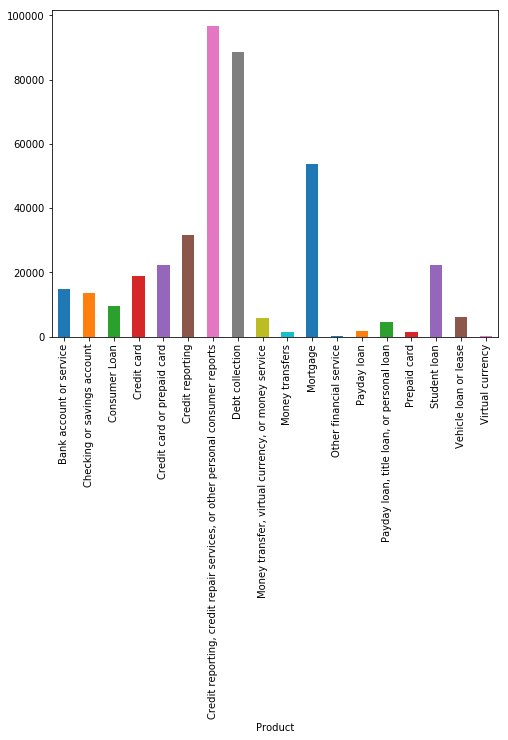

In [7]:
fig = plt.figure(figsize=(8, 6))
df.groupby('Product').Consumer_complaint_narrative.count().plot.bar(ylim=0)
plt.show()

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), 
                        stop_words='english')
features = tfidf.fit_transform(df.Consumer_complaint_narrative).toarray()
labels = df.category_id
features.shape

In [ ]:
from sklearn.feature_selection import chi2
import numpy as np

In [ ]:
N = 2

for Product, category_id in sorted(category_to_id.items()):
    features_chi2 = chi2(features, labels == category_id)
    indices = np.argsort(features_chi2[0])
    feature_names = np.array(tfidf.get_feature_names())[indices]
    unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
    bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
    print("")